In [4]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

In [5]:
import pandas as pd

from models.model.logistic_regression_model import LogisticRegressionModel
from models.model.xgboost_model import XGBModel

from features.tfidf_text_vectorizer import TfidfTextVectorizer
from preprocessing.cleaning.text_cleaning import process_text

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
init_train_df = pd.read_csv("../data/raw/quora_question_pairs_train.csv.zip", compression='zip', index_col=0)
init_test_df = pd.read_csv("../data/raw/quora_question_pairs_test.csv.zip", compression='zip', index_col=0)

In [7]:
init_train_df.head(3)

,qid1,qid2,question1,question2,is_duplicate
id,,,,,
332278,459256,459257,The Iliad and the Odyssey in the Greek culture?,How do I prove that the pairs of three indepen...,0
196656,297402,297403,What is practical management and what is strat...,What are the practical aspects of strategic ma...,0
113125,184949,184950,How useful is MakeUseOf Answers?,Is there any Q&A site that is not Yahoo answer...,0


In [8]:
init_test_df.head(3)

,qid1,qid2,question1,question2,is_duplicate
id,,,,,
305985,429434,429435,Why is beef banned in India and not pork as well?,Is beef banned in india?,0
5193,10230,10231,At what valuation did Homejoy raise money in D...,Should a wealthy founder self-fund his second ...,0
123326,199422,199423,How do we judge?,How do I judge my love?,0


In [9]:
print(init_train_df.shape), print(init_test_df.shape)

(323432, 5)
(80858, 5)


(None, None)

In [10]:
df_train = init_train_df.copy()
df_test = init_test_df.copy()

In [11]:
input_cols = ["question1", "question2"]
target_col = "is_duplicate"

In [12]:
df_train["combined"] = df_train["question1"].astype(str) + " [SEP] " + df_train["question2"].astype(str)
df_test["combined"] = df_test["question1"].astype(str) + " [SEP] " + df_test["question2"].astype(str)

In [13]:
vectorizer = TfidfTextVectorizer(
    text_column="combined",
    tokenizer=process_text,
    max_features=4000,
    min_df=3
)

X_train = vectorizer.fit_transform(df_train)
X_test = vectorizer.transform(df_test)
y_train = df_train["is_duplicate"]
y_test = df_test["is_duplicate"]

Running cross-validation before training...
Cross-validation f1: 0.5981 ± 0.0020


          Model Evaluation Metrics           
┏━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
┃ Metric   ┃ Train Value ┃ Validation Value ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩
│ f1_score │      0.6119 │           0.6056 │
│ roc_auc  │      0.8131 │           0.8015 │
└──────────┴─────────────┴──────────────────┘

Cross-validation Results:

          Cross-validation Metrics          
┏━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ Metric ┃ Mean Score ┃ Standard Deviation ┃
┡━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ f1     │     0.5981 │             0.0020 │
└────────┴────────────┴────────────────────┘

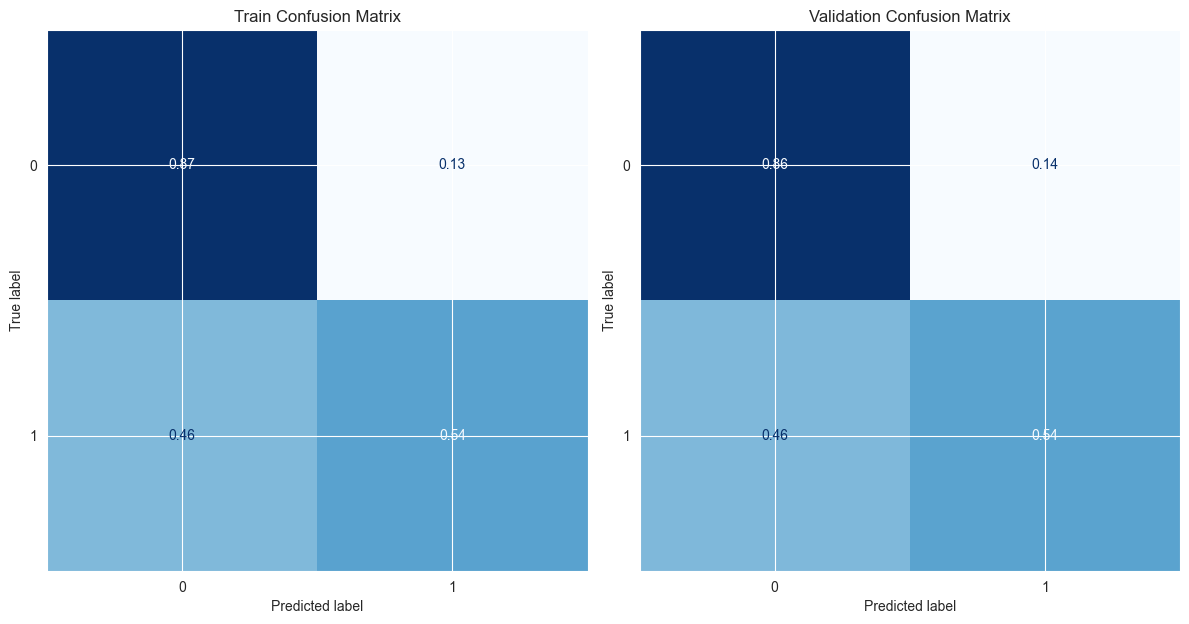

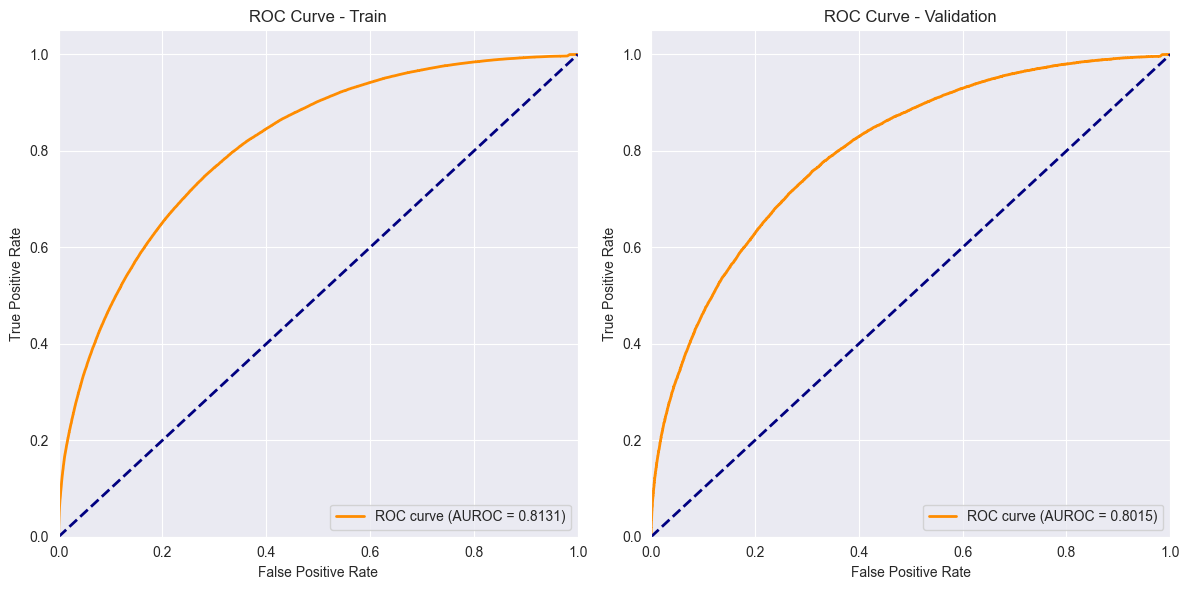

In [14]:
model = LogisticRegressionModel(
    X_train=X_train,
    y_train=y_train,
    X_val=X_test,
    y_val=y_test
)

model.fit().predict()
model.display_metrics()
model.display_confusion_matrix()
model.display_roc_auc()

## XGBoost

          Model Evaluation Metrics           
┏━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
┃ Metric   ┃ Train Value ┃ Validation Value ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩
│ f1_score │      0.5482 │           0.5329 │
│ roc_auc  │      0.8231 │           0.8044 │
└──────────┴─────────────┴──────────────────┘

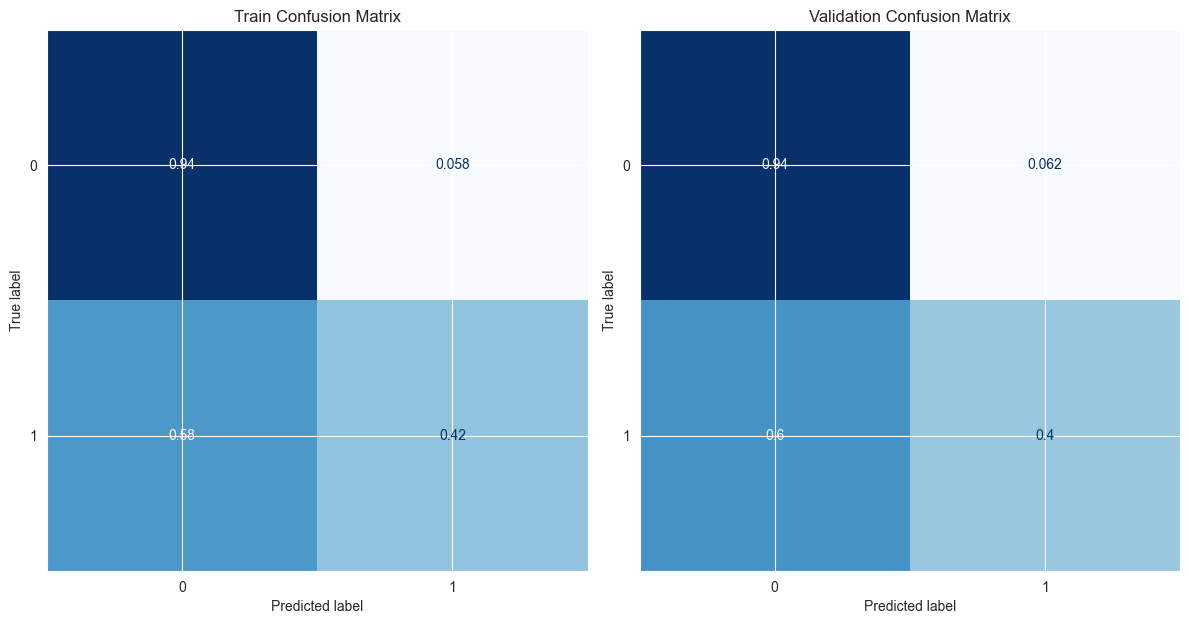

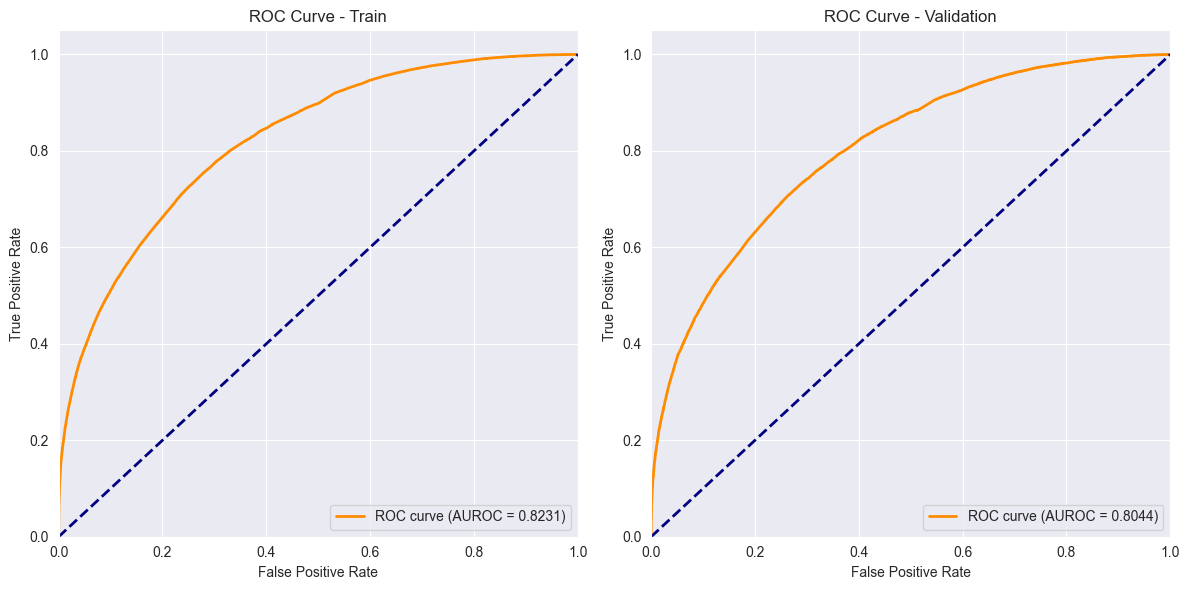

In [16]:
model = XGBModel(
    X_train=X_train,
    y_train=y_train,
    X_val=X_test,
    y_val=y_test
)

model.fit().predict()
model.display_metrics()
model.display_confusion_matrix()
model.display_roc_auc()